In [1]:
import pandas as pd, numpy as np, os
import matplotlib.pyplot as plt, gc


train_df = pd.read_csv(
    "/home/maxc/workspace/kaggle-hms/hms-harmful-brain-activity-classification/train.csv"
)
print("Train shape", train_df.shape)
display(train_df.head())

Train shape (106800, 15)


,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
0,1628180742,0,0.0,353733,0,0.0,127492639,42516,Seizure,3,0,0,0,0,0
1,1628180742,1,6.0,353733,1,6.0,3887563113,42516,Seizure,3,0,0,0,0,0
2,1628180742,2,8.0,353733,2,8.0,1142670488,42516,Seizure,3,0,0,0,0,0
3,1628180742,3,18.0,353733,3,18.0,2718991173,42516,Seizure,3,0,0,0,0,0
4,1628180742,4,24.0,353733,4,24.0,3080632009,42516,Seizure,3,0,0,0,0,0


In [2]:
unique_eeg = train_df.eeg_id.unique()
print("Unique EEGs", len(unique_eeg))

Unique EEGs 17089


In [3]:
# total vote is the sum of the last 6 columns
target_columns = ['seizure_vote', 'lpd_vote', 'gpd_vote', 'lrda_vote', 'grda_vote', 'other_vote']
train_df["total_votes"] = train_df[target_columns].sum(axis=1)
train_df[target_columns] = train_df[target_columns].div(train_df["total_votes"], axis=0)
train_df.head()

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote,total_votes
0,1628180742,0,0.0,353733,0,0.0,127492639,42516,Seizure,1.0,0.0,0.0,0.0,0.0,0.0,3
1,1628180742,1,6.0,353733,1,6.0,3887563113,42516,Seizure,1.0,0.0,0.0,0.0,0.0,0.0,3
2,1628180742,2,8.0,353733,2,8.0,1142670488,42516,Seizure,1.0,0.0,0.0,0.0,0.0,0.0,3
3,1628180742,3,18.0,353733,3,18.0,2718991173,42516,Seizure,1.0,0.0,0.0,0.0,0.0,0.0,3
4,1628180742,4,24.0,353733,4,24.0,3080632009,42516,Seizure,1.0,0.0,0.0,0.0,0.0,0.0,3


In [4]:
g10_train_df = train_df[train_df.total_votes >= 10]
print("Train shape", g10_train_df.shape)

Train shape (39946, 16)


In [5]:
g10_first_df = g10_train_df.groupby("eeg_id").first()
print("First shape", g10_first_df.shape)



First shape (5939, 15)


In [6]:
for target_columns in target_columns:
    # print the sum of the target columns

    print(target_columns, g10_first_df[target_columns].sum())

seizure_vote 297.31065082005483
lpd_vote 1088.3689016733629
gpd_vote 729.3982070522543
lrda_vote 454.4623007614871
grda_vote 533.1246952126435
other_vote 2836.335244480197


In [19]:
# check if eeg_label_offset_seconds column equal to spectrogram_label_offset_seconds
print(
    train_df[
        train_df["eeg_label_offset_seconds"]
        != train_df["spectrogram_label_offset_seconds"]
    ]
)

            eeg_id  eeg_sub_id  eeg_label_offset_seconds  spectrogram_id  \
30      1626798710           0                       0.0         1219001   
31      1626798710           1                      28.0         1219001   
32      2529955608           0                       0.0         1219001   
33      2529955608           1                      28.0         1219001   
34      2529955608           2                      30.0         1219001   
...            ...         ...                       ...             ...   
106774   641615525           2                      28.0      2146170054   
106775   641615525           3                      48.0      2146170054   
106781  3938393892           0                       0.0      2146798838   
106782  3938393892           1                       4.0      2146798838   
106783  1850739625           0                       0.0      2146798838   

        spectrogram_sub_id  spectrogram_label_offset_seconds    label_id  \
30         

Number of sub eegs [743, 664, 562, 534, 531, 433, 416, 412, 286, 275, 266, 256, 253, 236, 234, 230, 226, 221, 213, 210, 209, 206, 204, 202, 191, 184, 173, 172, 172, 168, 160, 157, 154, 151, 151, 150, 150, 148, 143, 142, 135, 135, 131, 125, 125, 124, 123, 122, 122, 121, 118, 116, 116, 113, 111, 111, 111, 109, 108, 107, 107, 106, 104, 102, 101, 100, 98, 97, 97, 95, 92, 92, 92, 91, 90, 90, 89, 89, 88, 88, 88, 87, 86, 86, 85, 84, 82, 82, 82, 80, 79, 79, 78, 77, 77, 75, 74, 73, 73, 71, 71, 71, 71, 71, 70, 70, 69, 69, 68, 68, 68, 68, 68, 67, 66, 66, 66, 65, 65, 65, 64, 64, 64, 63, 63, 62, 61, 61, 61, 61, 61, 60, 60, 60, 60, 60, 60, 60, 60, 60, 59, 59, 59, 58, 58, 58, 58, 57, 57, 57, 56, 56, 55, 55, 55, 55, 55, 55, 55, 54, 54, 54, 54, 53, 53, 53, 52, 52, 52, 52, 52, 51, 51, 51, 51, 51, 51, 50, 50, 50, 50, 50, 49, 49, 49, 49, 49, 49, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 47, 47, 47, 47, 47, 47, 46, 46, 46, 46, 46, 46, 46, 45, 45, 45, 45, 45, 45, 44, 44, 44, 44, 44, 44, 44, 44, 44, 43, 43

(array([1.3974e+04, 1.8680e+03, 5.9200e+02, 2.4000e+02, 1.2800e+02,
        7.5000e+01, 4.6000e+01, 3.5000e+01, 1.8000e+01, 1.8000e+01,
        9.0000e+00, 1.2000e+01, 7.0000e+00, 5.0000e+00, 8.0000e+00,
        4.0000e+00, 7.0000e+00, 1.0000e+00, 2.0000e+00, 3.0000e+00,
        5.0000e+00, 2.0000e+00, 1.0000e+00, 3.0000e+00, 1.0000e+00,
        1.0000e+00, 0.0000e+00, 3.0000e+00, 3.0000e+00, 1.0000e+00,
        2.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        2.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 2.0000e+00, 0.0000e+00, 0.00

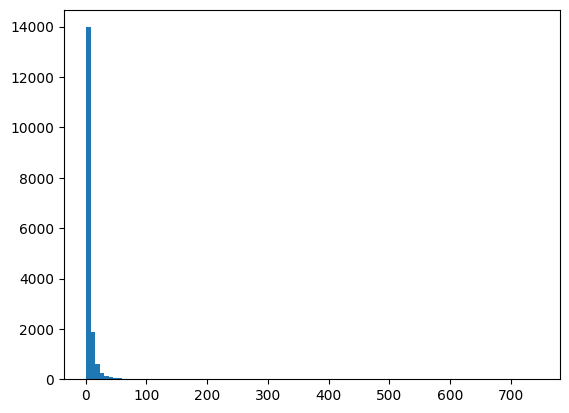

In [6]:
num_sub_eegs = []
for eeg in unique_eeg:
    num_sub_eegs.append(train_df[train_df.eeg_id == eeg].shape[0])
# sort highest to lowest
num_sub_eegs.sort(reverse=True)
print("Number of sub eegs", num_sub_eegs)


plt.hist(num_sub_eegs, bins=100)

(array([5.8189e+04, 1.7182e+04, 8.5700e+03, 4.6670e+03, 3.0160e+03,
        2.0960e+03, 1.6380e+03, 1.1940e+03, 9.8700e+02, 7.7900e+02,
        7.1000e+02, 6.2100e+02, 5.3900e+02, 4.7800e+02, 3.9200e+02,
        3.9100e+02, 3.5800e+02, 3.2300e+02, 2.7300e+02, 2.5000e+02,
        2.2800e+02, 1.8400e+02, 1.8700e+02, 1.6500e+02, 1.5500e+02,
        1.4300e+02, 1.2800e+02, 1.2300e+02, 1.2200e+02, 1.1900e+02,
        1.0500e+02, 1.1800e+02, 8.7000e+01, 7.4000e+01, 6.3000e+01,
        6.0000e+01, 6.3000e+01, 5.9000e+01, 7.3000e+01, 6.8000e+01,
        6.4000e+01, 4.2000e+01, 4.8000e+01, 4.5000e+01, 4.1000e+01,
        4.1000e+01, 5.6000e+01, 5.1000e+01, 4.9000e+01, 4.6000e+01,
        5.4000e+01, 6.0000e+01, 5.7000e+01, 4.4000e+01, 3.6000e+01,
        4.7000e+01, 4.5000e+01, 4.5000e+01, 3.8000e+01, 3.8000e+01,
        4.8000e+01, 4.4000e+01, 3.2000e+01, 3.9000e+01, 4.1000e+01,
        3.6000e+01, 4.5000e+01, 4.0000e+01, 4.4000e+01, 3.7000e+01,
        3.3000e+01, 2.9000e+01, 2.9000e+01, 2.70

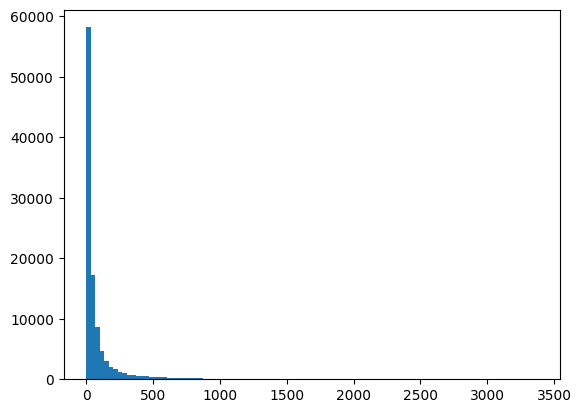

In [6]:
plt.hist(train_df["eeg_label_offset_seconds"], bins=100)

(array([1.6306e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        6.6600e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        9.4000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

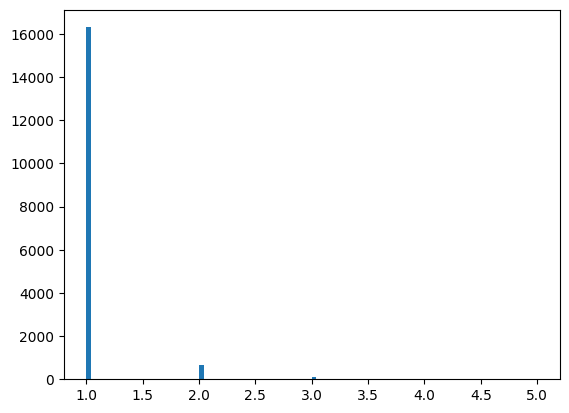

In [5]:
num_unique_consensus = []
for eeg in unique_eeg:
    sub_df = train_df[train_df.eeg_id == eeg]
    num_unique_consensus.append(sub_df.expert_consensus.unique().shape[0])

plt.hist(num_unique_consensus, bins=100)

In [5]:
print(sum(np.array(num_unique_consensus) > 1))

NameError: name 'num_unique_consensus' is not defined

In [7]:

print(np.mean(num_sub_eegs), np.median(num_sub_eegs), np.std(num_sub_eegs))
# count the number of eegs that only have 1 sub eeg
print(sum(np.array(num_sub_eegs) == 1))
print(sum(np.array(num_sub_eegs) == 2))
print(sum(np.array(num_sub_eegs) == 3))
print(sum(np.array(num_sub_eegs) == 4))

6.249634267657558 3.0 17.19737894568043
6324
1973
1430
1318


(array([20933., 16702., 16640., 18808., 18861., 14856.]),
 array([0.        , 0.83333333, 1.66666667, 2.5       , 3.33333333,
        4.16666667, 5.        ]),
 <BarContainer object of 6 artists>)

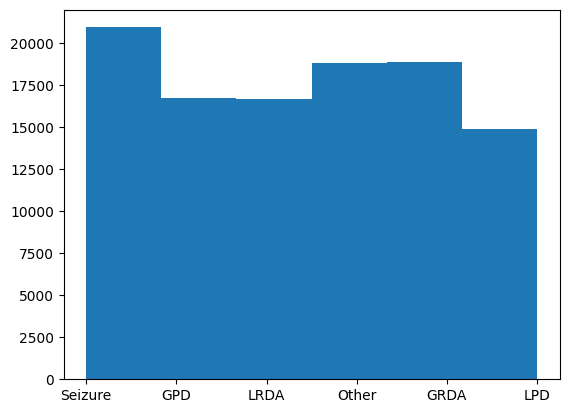

In [8]:
# plot the histogram of "expert_consensus"
plt.hist(train_df["expert_consensus"], bins=len(train_df["expert_consensus"].unique()))


1 743


(array([1.6994e+04, 5.8000e+01, 2.0000e+01, 9.0000e+00, 0.0000e+00,
        3.0000e+00, 0.0000e+00, 3.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([  1. ,  75.2, 149.4, 223.6, 297.8, 372. , 446.2, 520.4, 594.6,
        668.8, 743. ]),
 <BarContainer object of 10 artists>)

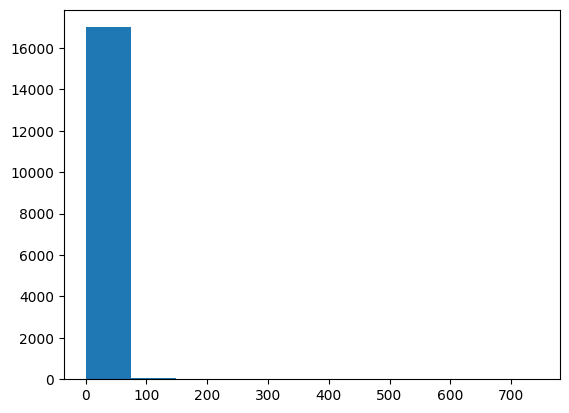

In [9]:
# group by eeg_id and iterate over the groups
grouped = train_df.groupby("eeg_id")
group_len = []
for name, group in grouped:
    group_len.append(len(group))
    # num consensus
    # num_consensus = len(group['expert_consensus'].unique())
    # if num_consensus > 1:
    #     print(num_consensus)
    #     print(group['expert_consensus'].unique())
    #     print(name)
print(min(group_len), max(group_len))
plt.hist(group_len, bins=10)

In [10]:
# group by eeg_id and iterate over the groups
grouped = train_df.groupby("patient_id")
more_than_one = 0
for name, group in grouped:
    # num consensus
    num_consensus = len(group["expert_consensus"].unique())
    if num_consensus > 1:
        print(num_consensus)
        print(group["expert_consensus"].unique())
        print(name)
        more_than_one += 1

print(more_than_one)
print(len(grouped))

3
['Other' 'GRDA' 'LPD']
105
4
['GRDA' 'LRDA' 'Other' 'LPD']
195
2
['Seizure' 'Other']
198
2
['Seizure' 'Other']
260
2
['Seizure' 'Other']
282
3
['LPD' 'Other' 'Seizure']
312
2
['LRDA' 'Seizure']
345
2
['Seizure' 'GRDA']
346
2
['Other' 'Seizure']
475
2
['Other' 'Seizure']
655
3
['LRDA' 'Seizure' 'GRDA']
726
4
['Other' 'Seizure' 'GRDA' 'LPD']
840
2
['Seizure' 'Other']
848
2
['GRDA' 'Other']
859
2
['GPD' 'LRDA']
932
2
['Other' 'GRDA']
1038
4
['Other' 'GRDA' 'LRDA' 'Seizure']
1069
2
['GPD' 'Other']
1169
2
['LPD' 'Other']
1218
3
['Other' 'LRDA' 'GRDA']
1282
2
['Other' 'GRDA']
1413
2
['Seizure' 'GPD']
1453
2
['Other' 'Seizure']
1484
2
['LRDA' 'Other']
1501
3
['LPD' 'Seizure' 'Other']
1525
2
['Seizure' 'GRDA']
1705
2
['GPD' 'GRDA']
1785
2
['GRDA' 'Other']
1851
3
['Seizure' 'GPD' 'Other']
1865
2
['Seizure' 'GRDA']
2053
3
['Seizure' 'LPD' 'Other']
2143
3
['GRDA' 'LRDA' 'Other']
2170
2
['GPD' 'Other']
2205
2
['Other' 'GRDA']
2230
4
['Other' 'GPD' 'GRDA' 'LPD']
2338
2
['Other' 'GRDA']
2351
2
['S

In [11]:
sub_df = train_df[train_df["patient_id"] == 50110]
print(sub_df["eeg_id"].unique())
sub_df

[3493660607 1924784623 3241737256 2470188842 4185280755 1167684234
  475000282 1233581398 4131920975 2325752917 3943794653 1681178270
 2876590773 1952393183 1285832179 2367616945 2081166446 2340914423
  902060055 1675098544]


,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
4640,3493660607,0,0.0,75429090,0,0.0,3694164052,50110,GPD,1,2,5,0,5,5
4641,3493660607,1,6.0,75429090,1,6.0,1412529594,50110,GPD,1,2,5,0,5,5
4642,3493660607,2,8.0,75429090,2,8.0,4121512167,50110,GPD,1,2,5,0,5,5
4643,3493660607,3,10.0,75429090,3,10.0,1125297970,50110,GPD,1,2,5,0,5,5
4644,1924784623,0,0.0,75429090,4,210.0,3990868348,50110,Other,1,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93698,2340914423,0,0.0,1897844669,0,0.0,4221111792,50110,Other,0,0,0,1,1,15
99746,902060055,0,0.0,1997021817,0,0.0,2391748277,50110,Other,0,0,0,0,1,14
99747,902060055,1,2.0,1997021817,1,2.0,387054086,50110,Other,0,0,0,0,1,14
99748,902060055,2,6.0,1997021817,2,6.0,2515011093,50110,Other,0,0,0,0,1,14


In [12]:
%%time
print(train_df['eeg_id'].nunique())
print(train_df['spectrogram_id'].nunique())
print(train_df['spectrogram_label_offset_seconds'].unique())
print(train_df['patient_id'].nunique())

17089
11138
[   0.    6.    8. ... 1135. 1201. 1207.]
1950
CPU times: user 6.04 ms, sys: 0 ns, total: 6.04 ms
Wall time: 5.53 ms


In [13]:
eeg = pd.read_parquet(
    "/home/maxc/workspace/kaggle-hms/hms-harmful-brain-activity-classification/train_eegs/568657.parquet"
)
eeg = pd.read_parquet(
    "/home/maxc/workspace/kaggle-hms/hms-harmful-brain-activity-classification/test_eegs/3911565283.parquet"
)
print(eeg.shape)
print(eeg.head())

(10000, 20)
         Fp1         F3         C3     P3         F7     T3         T5     O1  \
0   9.210000 -47.459999  15.100000   8.22 -16.900000 -22.99 -25.820000 -10.09   
1  -3.590000 -30.290001  32.380001  10.80 -68.980003 -21.60 -15.080000  -9.21   
2 -26.040001 -60.070000   2.370000 -10.15 -34.689999 -31.40 -31.920000 -26.98   
3  -3.040000 -36.250000  29.559999  14.53 -14.010000 -11.90 -14.230000  -6.31   
4  -4.630000 -20.160000  25.190001   1.19 -44.580002 -23.51 -30.709999 -17.60   

          Fz     Cz         Pz         Fp2         F4     C4     P4  \
0  28.370001  -3.01 -27.299999  101.040001  35.110001  14.54  18.33   
1  26.360001  -8.98 -32.279999   95.800003  26.389999   4.82  10.54   
2  -1.940000 -28.77 -49.770000   73.449997  -3.680000 -17.32 -16.15   
3  26.040001  -2.77 -25.030001   91.010002  22.610001   6.90   9.93   
4  25.420000  -8.86 -33.959999   89.449997  19.440001  -2.08   6.11   

          F8         T4         T6     O2         EKG  
0  28.540001  44.0

(320, 401)
time
LL_0.59
LL_0.78
LL_0.98
LL_1.17
LL_1.37
LL_1.56
LL_1.76
LL_1.95
LL_2.15
LL_2.34
LL_2.54
LL_2.73
LL_2.93
LL_3.13
LL_3.32
LL_3.52
LL_3.71
LL_3.91
LL_4.1
LL_4.3
LL_4.49
LL_4.69
LL_4.88
LL_5.08
LL_5.27
LL_5.47
LL_5.66
LL_5.86
LL_6.05
LL_6.25
LL_6.45
LL_6.64
LL_6.84
LL_7.03
LL_7.23
LL_7.42
LL_7.62
LL_7.81
LL_8.01
LL_8.2
LL_8.4
LL_8.59
LL_8.79
LL_8.98
LL_9.18
LL_9.38
LL_9.57
LL_9.77
LL_9.96
LL_10.16
LL_10.35
LL_10.55
LL_10.74
LL_10.94
LL_11.13
LL_11.33
LL_11.52
LL_11.72
LL_11.91
LL_12.11
LL_12.3
LL_12.5
LL_12.7
LL_12.89
LL_13.09
LL_13.28
LL_13.48
LL_13.67
LL_13.87
LL_14.06
LL_14.26
LL_14.45
LL_14.65
LL_14.84
LL_15.04
LL_15.23
LL_15.43
LL_15.63
LL_15.82
LL_16.02
LL_16.21
LL_16.41
LL_16.6
LL_16.8
LL_16.99
LL_17.19
LL_17.38
LL_17.58
LL_17.77
LL_17.97
LL_18.16
LL_18.36
LL_18.55
LL_18.75
LL_18.95
LL_19.14
LL_19.34
LL_19.53
LL_19.73
LL_19.92
RL_0.59
RL_0.78
RL_0.98
RL_1.17
RL_1.37
RL_1.56
RL_1.76
RL_1.95
RL_2.15
RL_2.34
RL_2.54
RL_2.73
RL_2.93
RL_3.13
RL_3.32
RL_3.52
RL_3.71
RL_3.9

,time,LL_0.59,LL_0.78,LL_0.98,LL_1.17,LL_1.37,LL_1.56,LL_1.76,LL_1.95,LL_2.15,...,RP_18.16,RP_18.36,RP_18.55,RP_18.75,RP_18.95,RP_19.14,RP_19.34,RP_19.53,RP_19.73,RP_19.92
0,1,4.26,10.98,9.05,13.65,11.49,8.930000,18.840000,19.26,19.240000,...,0.31,0.17,0.28,0.19,0.24,0.27,0.29,0.16,0.22,0.19
1,3,2.65,3.97,12.18,13.26,14.21,13.230000,9.650000,8.11,11.280000,...,0.15,0.13,0.14,0.24,0.24,0.36,0.35,0.31,0.36,0.40
2,5,4.18,4.53,8.77,14.26,13.36,16.559999,19.219999,17.51,22.650000,...,0.29,0.21,0.16,0.25,0.28,0.28,0.34,0.48,0.44,0.48
3,7,2.41,3.21,4.92,8.07,5.97,12.420000,10.820000,14.96,21.809999,...,0.33,0.51,0.49,0.64,0.58,0.42,0.32,0.31,0.32,0.33
4,9,2.29,2.44,2.77,4.62,5.39,7.080000,9.840000,12.27,14.410000,...,0.44,0.38,0.48,0.63,0.45,0.45,0.49,0.33,0.31,0.34


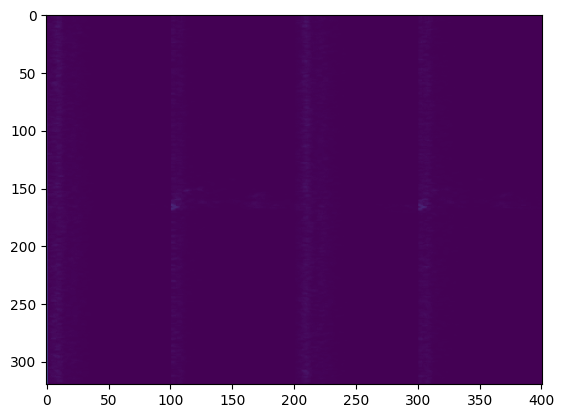

In [18]:
spec_gram = pd.read_parquet(
    "/home/maxc/workspace/kaggle-hms/hms-harmful-brain-activity-classification/train_spectrograms/353733.parquet"
)
print(spec_gram.shape)
import matplotlib.pyplot as plt

for col in spec_gram.columns:
    print(col)
plt.imshow(spec_gram.values, aspect="auto")
spec_gram.head()
# print(spec_gram['time'])
# get the colums with LL
# print(spec_gram.columns[spec_gram.columns.str.contains("LL")])

In [15]:
spec_gram.head()

,time,LL_0.59,LL_0.78,LL_0.98,LL_1.17,LL_1.37,LL_1.56,LL_1.76,LL_1.95,LL_2.15,...,RP_18.16,RP_18.36,RP_18.55,RP_18.75,RP_18.95,RP_19.14,RP_19.34,RP_19.53,RP_19.73,RP_19.92
0,1,4.26,10.98,9.05,13.65,11.49,8.930000,18.840000,19.26,19.240000,...,0.31,0.17,0.28,0.19,0.24,0.27,0.29,0.16,0.22,0.19
1,3,2.65,3.97,12.18,13.26,14.21,13.230000,9.650000,8.11,11.280000,...,0.15,0.13,0.14,0.24,0.24,0.36,0.35,0.31,0.36,0.40
2,5,4.18,4.53,8.77,14.26,13.36,16.559999,19.219999,17.51,22.650000,...,0.29,0.21,0.16,0.25,0.28,0.28,0.34,0.48,0.44,0.48
3,7,2.41,3.21,4.92,8.07,5.97,12.420000,10.820000,14.96,21.809999,...,0.33,0.51,0.49,0.64,0.58,0.42,0.32,0.31,0.32,0.33
4,9,2.29,2.44,2.77,4.62,5.39,7.080000,9.840000,12.27,14.410000,...,0.44,0.38,0.48,0.63,0.45,0.45,0.49,0.33,0.31,0.34


In [16]:

sample_label = np.array([1,3,0,0,1]).astype(np.float32)
def soft_label(label, soft_value = 0.1/6.0):
    # label_sum = np.sum(label)
    label = label.astype(np.float32)
    label += soft_value
    label = label/np.sum(label)

    return label

print(soft_label(sample_label, 0.1))

print(soft_label(np.array([0,0,0,0,0,1])))
print(soft_label(np.array([0,0,0,0,0,3])))
print(soft_label(np.array([0,3,0,0,0, 12])))
print(soft_label(np.array([0,0,0,0,0,20])))

[0.20000002 0.5636364  0.01818182 0.01818182 0.20000002]
[0.01515152 0.01515152 0.01515152 0.01515152 0.01515152 0.9242424 ]
[0.00537634 0.00537634 0.00537634 0.00537634 0.00537634 0.9731183 ]
[0.00110375 0.19977926 0.00110375 0.00110375 0.00110375 0.79580575]
[8.291874e-04 8.291874e-04 8.291874e-04 8.291874e-04 8.291874e-04
 9.958540e-01]
